In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

Записываем функцию Матьяса: $f(x,y)=0.26(x^2+y^2)-0.48xy$

In [66]:
#Функция Матьяса
def Matias_E(x,y):
  return 0.26*(x*x + y*y) - 0.48*x*y
#Производная по x
def Matias_dEdx(x,y):
  return 0.52 * x - 0.48 * y
#Производная по y
def Matias_dEdy(x,y):
  return 0.52 * y - 0.48 * x

Записываем функцию Химмельблау: $f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2$


In [67]:
#Функция Химмельблау
def H_E(x,y):
  return (x**2+y-11)**2+(x+y**2-7)**2
#Производная по x
def H_dEdx(x,y):
  return 2*(2*x*(x**2+y-11)+x+y**2-7)
#Производная по y
def H_dEdy(x,y):
  return 2*(x**2+2*y*(x+y**2-7)+y-11)

Метод градиентного спуска

In [68]:
def GradientDescent(E, dEdx, dEdy, x0, y0, LearningRate, Iterations, PlotMin, PlotMax):
  '''
  E - функция
  dEdx, dEdy - частные производные функции
  x0, y0 - начальные приближения точки
  LearningRate - скорость обучения
  Iterations - количество итераций
  PlotMin, PlotMax - область определения функции
  '''
  x_plt = np.arange(PlotMin,PlotMax,0.1)
  y_plt = np.arange(PlotMin,PlotMax,0.1)
  E_plt = np.array([[E(x,y) for x in x_plt] for y in y_plt])
  #интерактивное отображения графика
  plt.ion()
  fig = plt.figure()
  ax = Axes3D(fig)
  #Создание графика
  x, y = np.meshgrid(x_plt,y_plt)
  ax.plot_surface(x,y, E_plt, color='y', alpha=0.5)
  #Подписи осей
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('E')
  #Точка
  Point = ax.scatter(x0, y0, E(x0, y0), c='red')
  #Алгоритм градиентного спуска
  x1=x0-LearningRate * dEdx(x0,y0)
  y1=y0-LearningRate * dEdy(x0,y0)
  for _ in range(Iterations):
    x0=x1
    y0=y1
    x1=x0-LearningRate * dEdx(x0,y0)
    y1=y0-LearningRate * dEdy(x0,y0)
    ax.scatter(x1,y1,E(x1,y1), c='red')
  #Вывод значений на консоль
  print('x={0}, y={1}, E={2}'.format(x1,y1,E(x1,y1)))
  #Выключение интерактивного отображения
  plt.ioff()
  plt.show()

Тест для функции Матьяса: $f(x,y)=0.26(x^2+y^2)-0.48xy$

Локальный минимум $f(0,0)=0$

x=-0.3815204244769455, y=0.3815204244769455, E=0.14555783429306868


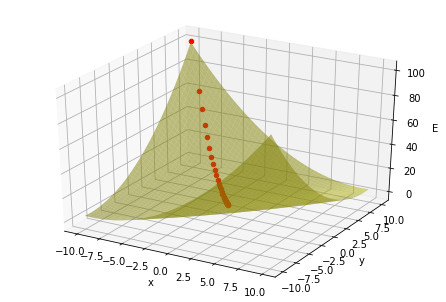

In [69]:
GPStopPoint = GradientDescent(Matias_E, Matias_dEdx, Matias_dEdy, -10, 10, 0.1, 30, -10, 10 )

Тест для функции Химмельблау.

Локальные минимумы: 

$f(3,2)=0$, 

$f(-2.81,3.13)=0$, 

$f(-3.78,-3.28)=0$, 

$f(3.58,-1.85)=0$.

x=-2.8359243799109835, y=3.14566737806716, E=0.038910933939490015


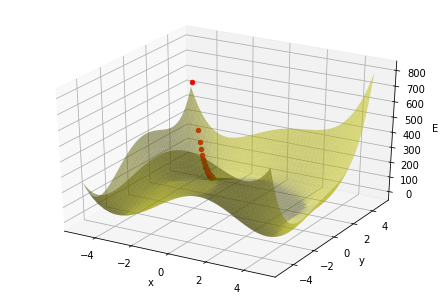

In [70]:
HStopPoint = GradientDescent(H_E, H_dEdx, H_dEdy, -5, 5, 0.001, 50, -5, 5 )

Стохастический градиентный спуск моментный

In [71]:
def StochasticGradientDescent(E, dEdx, dEdy, x0, y0, LearningRate, Iterations, PlotMin, PlotMax, m):
  '''
  E - функция
  dEdx, dEdy - частные производные функции
  x0, y0 - начальные приближения точки
  LearningRate - скорость обучения
  Iterations - количество итераций
  PlotMin, PlotMax - область определения функции
  m - моментная характеристика
  '''
  x_plt = np.arange(PlotMin,PlotMax,0.1)
  y_plt = np.arange(PlotMin,PlotMax,0.1)
  E_plt = np.array([[E(x,y) for x in x_plt] for y in y_plt])
  #интерактивное отображения графика
  plt.ion()
  fig = plt.figure()
  ax = Axes3D(fig)
  #Создание графика
  x, y = np.meshgrid(x_plt,y_plt)
  ax.plot_surface(x,y, E_plt, color='y', alpha=0.5)
  #Подписи осей
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('E')
  #Точка
  Point = ax.scatter(x0, y0, E(x0, y0), c='red')
  #Алгоритм градиентного спуска
  x1=x0-LearningRate * dEdx(x0,y0)
  y1=y0-LearningRate * dEdy(x0,y0)
  for n in range(Iterations):
    x0=x1
    y0=y1

    if n==0:
      vx = dEdx(x0,y0)
      vy = dEdy(x0,y0)
    else:
      vx = m * vx + dEdx(x0,y0)
      vy = m * vy + dEdy(x0,y0)

    x1=x0-LearningRate * vx
    y1=y0-LearningRate * vy
    ax.scatter(x1,y1,E(x1,y1), c='red')
    #Вывод значений на консоль
  print('x={0}, y={1}, E={2}'.format(x1,y1,E(x1,y1)))
  #Выключение интерактивного отображения
  plt.ioff()
  plt.show()

Тест для функции Матьяса

x=-0.3679351899314373, y=0.3679351899314373, E=0.13537630398988285


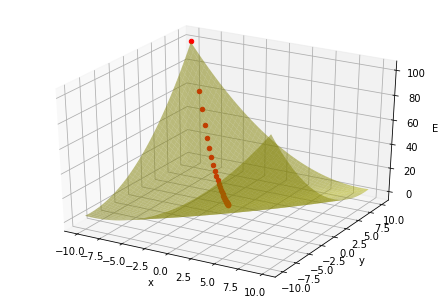

In [72]:
GPStopPoint = StochasticGradientDescent(Matias_E, Matias_dEdx, Matias_dEdy, -10, 10, 0.1, 30, -10, 10, 0.01 )

Тест для функции Химмельблау

x=-2.8347482747484234, y=3.1450024593176864, E=0.03585753811385986


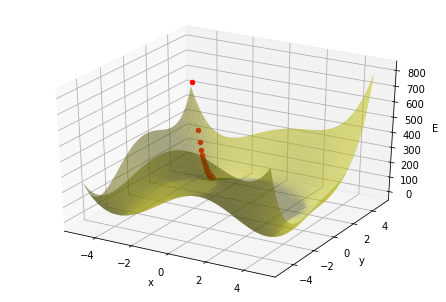

In [73]:
HStopPoint = StochasticGradientDescent(H_E, H_dEdx, H_dEdy, -5, 5, 0.001, 50, -5, 5, 0.01 )

Градиентный спуск Adagrad

In [74]:
def AdagradGradientDescent(E, dEdx, dEdy, point, LearningRate, Iterations, PlotMin, PlotMax):
  '''
  E - функция
  dEdx, dEdy - частные производные функции
  point - начальные приближения точки
  LearningRate - скорость обучения
  Iterations - количество итераций
  PlotMin, PlotMax - область определения функции
  '''
  x_plt = np.arange(PlotMin,PlotMax,0.1)
  y_plt = np.arange(PlotMin,PlotMax,0.1)
  E_plt = np.array([[E(x,y) for x in x_plt] for y in y_plt])
  #интерактивное отображения графика
  plt.ion()
  fig = plt.figure()
  ax = Axes3D(fig)
  #Создание графика
  x, y = np.meshgrid(x_plt,y_plt)
  ax.plot_surface(x,y, E_plt, color='y', alpha=0.5)
  #Подписи осей
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('E')
  #Точка
  Point = ax.scatter(point[0], point[1], E(point[0], point[1]), c='red')
  #Алгоритм градиентного спуска
  s_sum_x = 0
  s_sum_y = 0
  x1=point[0]-LearningRate * dEdx(point[0], point[1])
  y1=point[1]-LearningRate * dEdy(point[0], point[1])
  for _ in range(Iterations):
    point[0]=x1
    point[1]=y1
    s_sum_x += dEdx(point[0], point[1])**2
    s_sum_y += dEdy(point[0], point[1])**2

    x1 = point[0] - LearningRate * (dEdx(point[0], point[1]) / math.sqrt(s_sum_x))
    y1 = point[1] - LearningRate * (dEdy(point[0], point[1]) / math.sqrt(s_sum_y))

    ax.scatter(point[0],point[1],E(point[0],point[1]), c='red')
  print('x={0}, y={1}, E={2}'.format(x1,y1,E(x1,y1)))
  #Выключение интерактивного отображения
  plt.ioff()
  plt.show()

Тест для функции Матьяса

x=0.0, y=0.0, E=0.0


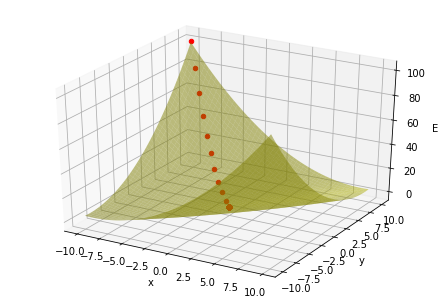

In [75]:
point = np.array([-10,10])
GPStopPoint = AdagradGradientDescent (Matias_E, Matias_dEdx, Matias_dEdy, point, 0.1, 50, -10, 10)

Тест для функции Химмельблау

x=-2.0000092957294116, y=3.00000632930408, E=15.999651904250776


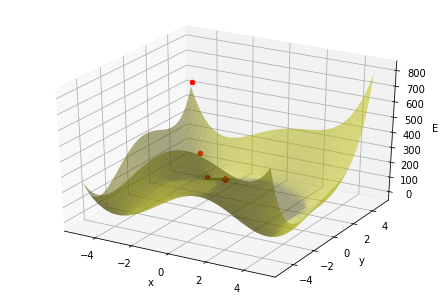

In [76]:
point = np.array([-5,5])
HStopPoint = AdagradGradientDescent(H_E, H_dEdx, H_dEdy, point, 0.0001, 100, -5, 5)